## A1: Predicting Car Price ##
This data is a regression problem, trying to predict car price.

The followings describe the features.

name : brandname of the car
year : released year car selling_price : price for buying the car km_driven : kilometer that the car has been driven
fuel : fuel that the car can used
seller_type : someone that customer buy the car
transmission : manual or anutomatic
owner : the number of owners that how many people used it.
mileage : a term use to express the fuel efficiency of a vehicle.
engine : size of engine
max_power : maximum power output that car can make.
torque : a measurement of your car's ability to do work.
seats : the capacity that one car can carry people.

## 1.Load dataset

Import some important library.

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [212]:
df = pd.read_csv('data/Cars.csv') #Load the data from .csv file so 'data/Cars.csv' is path to your data

In [213]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [214]:
df.shape #There are 8128 samples, 12 features

(8128, 13)

## 2.EDA (Explotory Data Analysis)

is the most important step to understand the data

<Axes: xlabel='year', ylabel='count'>

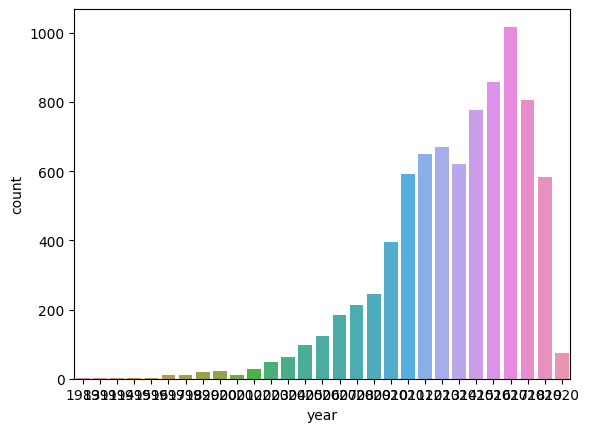

In [215]:
sns.countplot(data = df, x = 'year')

<Axes: xlabel='km_driven', ylabel='count'>

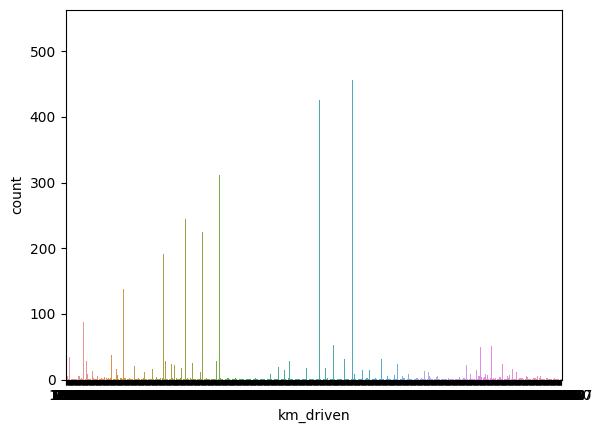

In [216]:
sns.countplot(data = df, x = 'km_driven')

<Axes: xlabel='fuel', ylabel='count'>

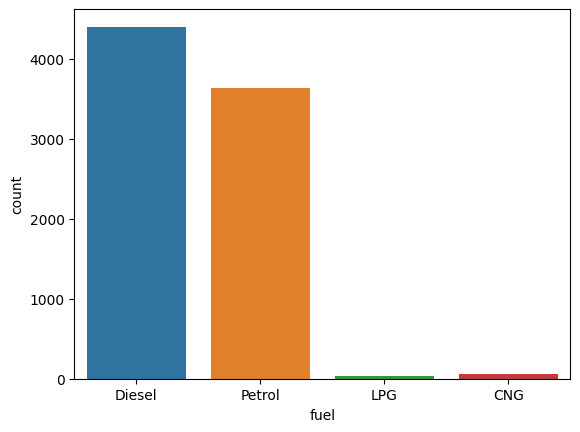

In [217]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

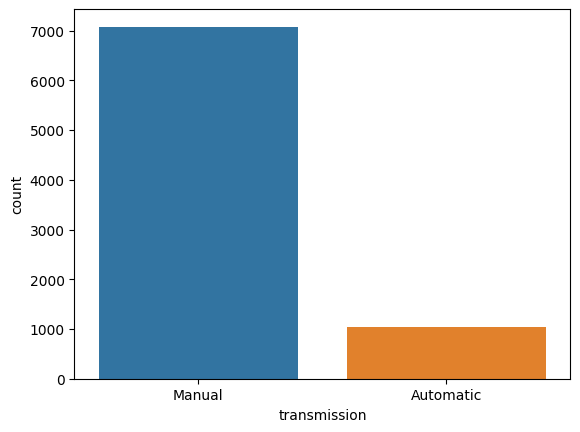

In [218]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='owner', ylabel='count'>

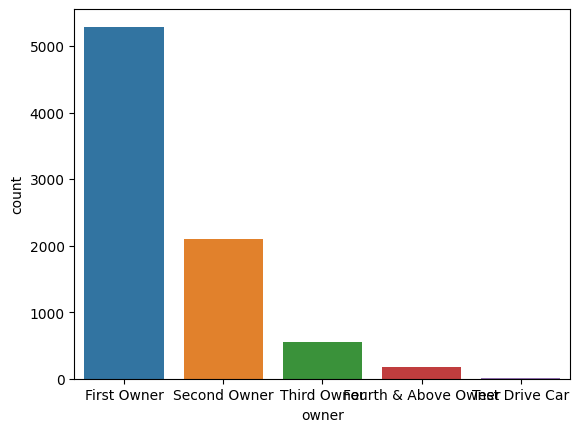

In [219]:
sns.countplot(data = df, x = 'owner')

<Axes: xlabel='engine', ylabel='count'>

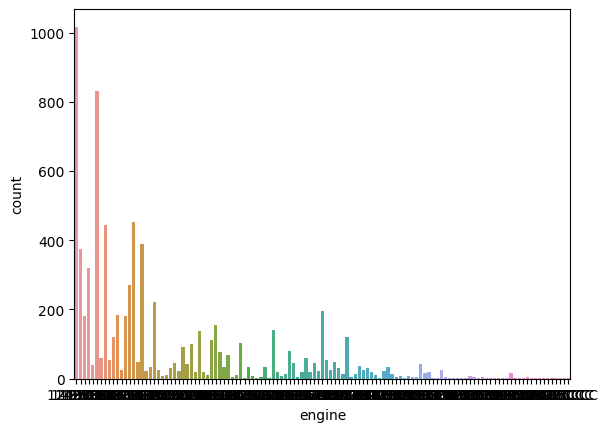

In [220]:
sns.countplot(data = df, x = 'engine')

<Axes: xlabel='max_power', ylabel='count'>

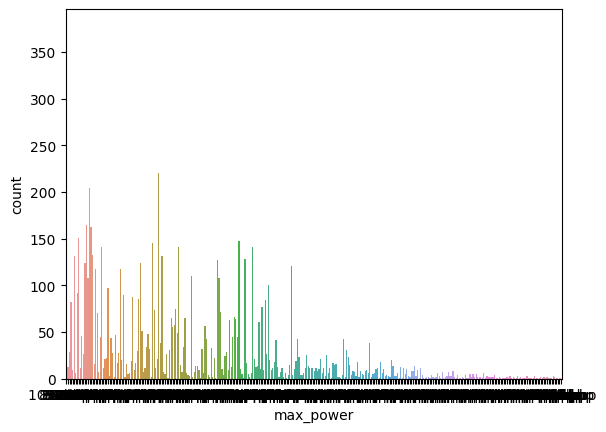

In [221]:
sns.countplot(data = df, x = 'max_power')

<Axes: xlabel='seats', ylabel='count'>

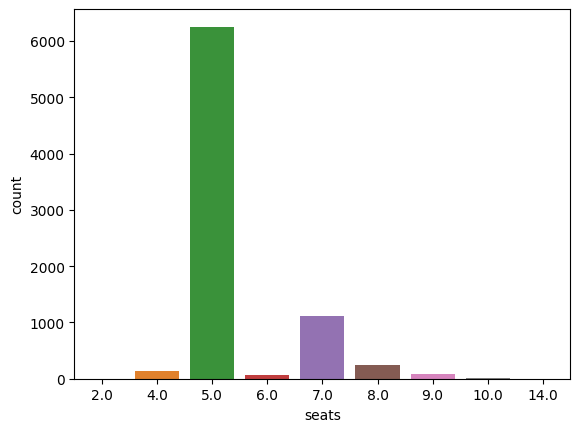

In [222]:
sns.countplot(data = df, x = 'seats')

In [223]:
#Change 'name' -> 'brand'
df.rename(columns = {'name' : 'brand'
                     }, inplace = True)

In [224]:
# Map First Owner to 1 .... Test Drive Car to 5
label_mapping = {
    'First Owner' : 1,
    'Second Owner' : 2,
    'Third Owner' : 3,
    'Fourth & Above Owner' : 4,
    'Test Drive Car' : 5
}
categorical_data = df['owner']
df['owner'] = [label_mapping[label] for label in categorical_data]

In [225]:
#Remove all rows that having 'CNG' and 'LPG'
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [226]:
#For 'mileage' remove kmpl and convert to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)

In [227]:
#For 'engine' remove 'CC' and covert to float
df['engine'] = df['engine'].str.split().str[0].astype(float)

In [228]:
#For 'max_power' remove ' bhp' and convert to float
df['max_power'] = df['max_power'].str.split().str[0].astype(float)

In [229]:
#For 'brand' remove all model of cars, we will get only the name.
df['brand'] = df['brand'].str.split().str[0]

In [230]:
#Eliminated column 'torque'
df =df.drop(columns=['torque'])

In [231]:
#Eliminated 'owner' that having Test-Drive Car
df = df[df['owner'] != 5]
#Let's checks...
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


Before plot correlation matrix we will encoded something...

In [232]:
from sklearn.preprocessing import LabelEncoder

# Label encoded for 'fuel'
fuel_le = LabelEncoder()
df['fuel'] = fuel_le.fit_transform(df['fuel'])

In [233]:
# Label encoded for 'transmission'
trans_le = LabelEncoder()
df['transmission'] = trans_le.fit_transform(df['transmission'])

<Axes: >

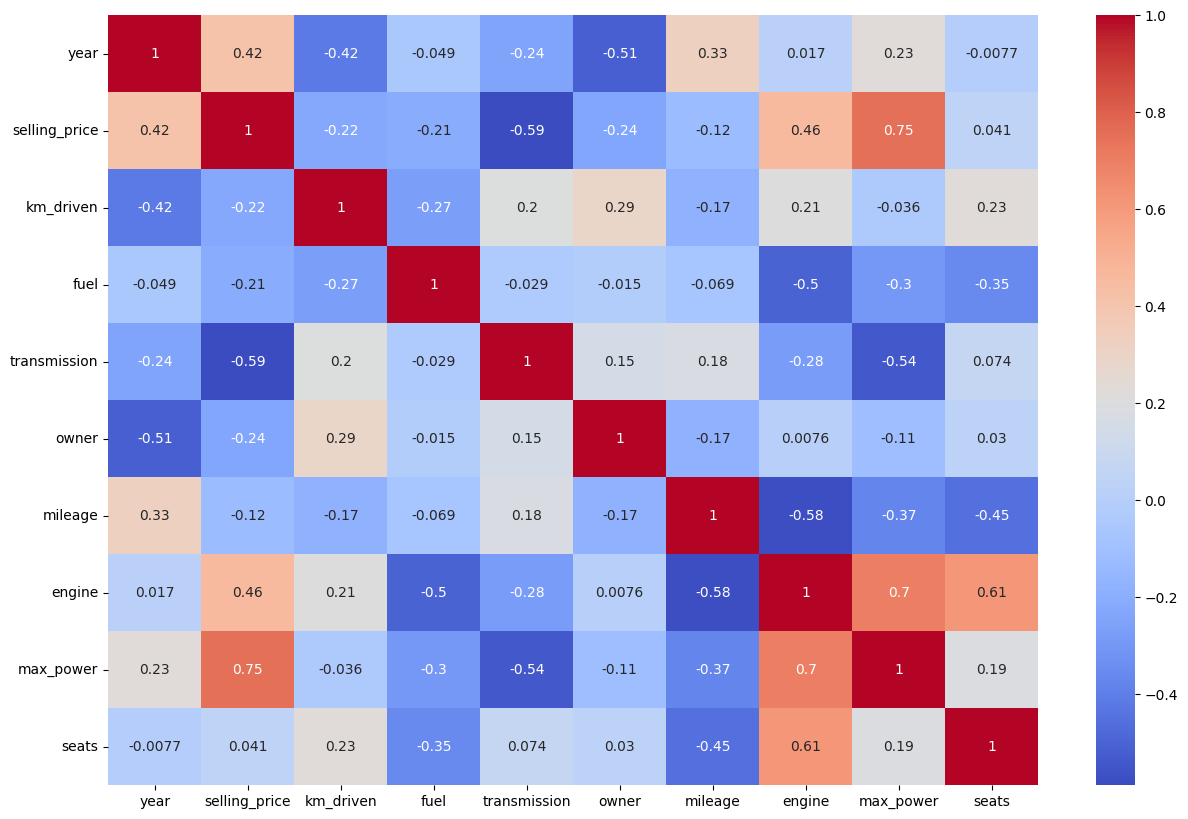

In [234]:
#plot to see relation between variable that having more correlated or less correlated 
plt.figure(figsize = (15,10)) #size of table
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') #use heatmap that having cool-warm colors

Note That : Features must not be corelated and we should not pick both of them.You can choose for only one that has the most importance.

<Axes: xlabel='x', ylabel='y'>

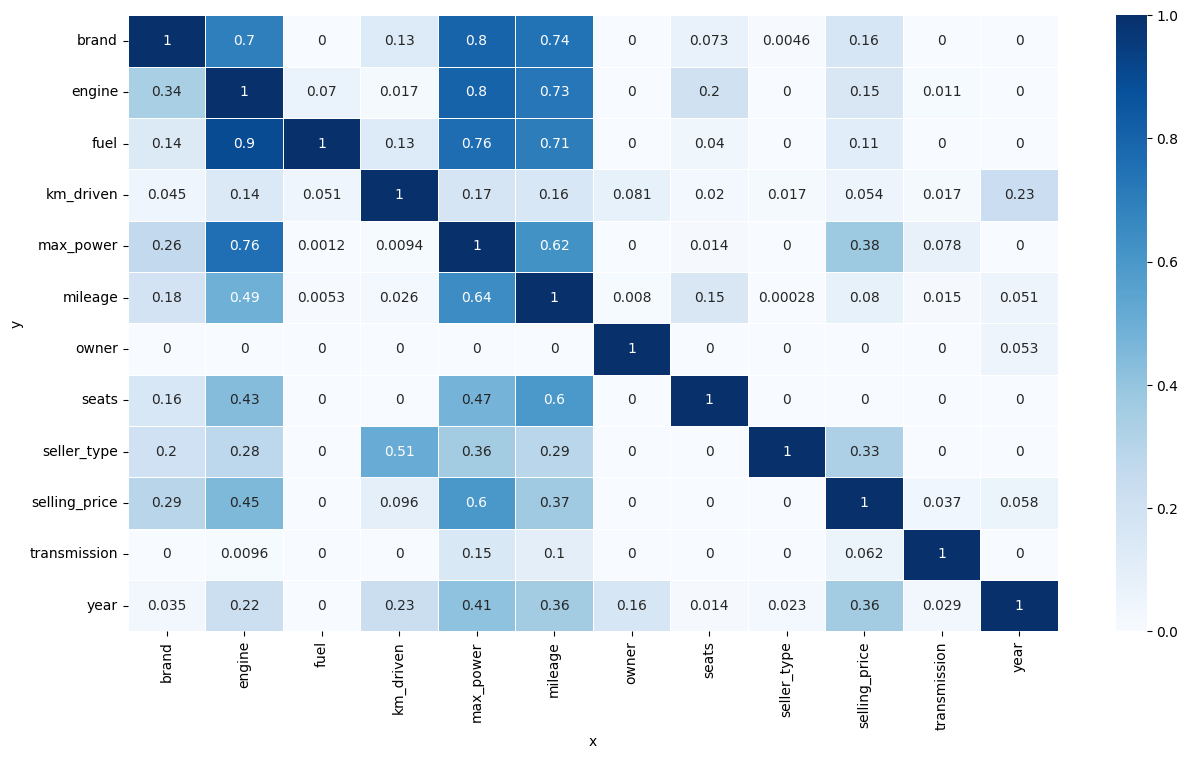

In [235]:
#plot to see between features (X) and label (y) 
import ppscore as pps

dfcopy = df.copy()

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore') #plotting..

plt.figure(figsize = (15,8)) #size of table
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='Blues', linewidths=0.5, annot=True) #use heatmap that having blues colors

## 3.Feature selection

We will choose the important feature that related to label.

In [236]:
X = df[['max_power', 'mileage', 'km_driven']] #Choose some features and store to X variable

y = np.log(df['selling_price']) #Choose label and store to y variable

### Train test split

- Test set is test accuracy for training set.
- Test set should never be touch when you compare the model.

In [237]:
from sklearn.model_selection import train_test_split #import scikit-learn library

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#spilt X and y to X_train, X_test, y_train, y_test that have size of test set = 0.2 and 
#seed = 42 (random factor for which one go to training set or test set)

## 4.Preprocessing

- Try to find mean and median to fill the missing values of the data (Imputation).

(91.8197257033248, 82.4)

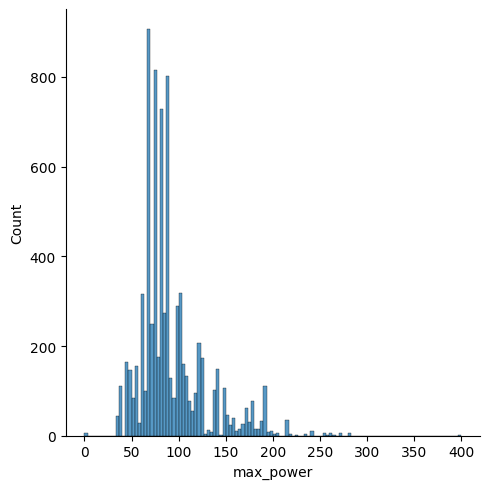

In [238]:
# Let's inspect the distribution plot, mean and median of max_power
sns.displot(data=df, x='max_power')
df['max_power'].mean(),df['max_power'].median()

(19.391961863322244, 19.3)

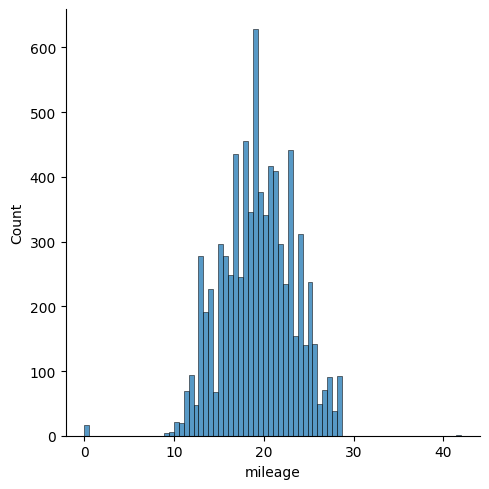

In [239]:
# Let's inspect the distribution plot, mean and median of mileage
sns.displot(data=df, x='mileage')
df['mileage'].mean(),df['mileage'].median()

(69773.14025909317, 60000.0)

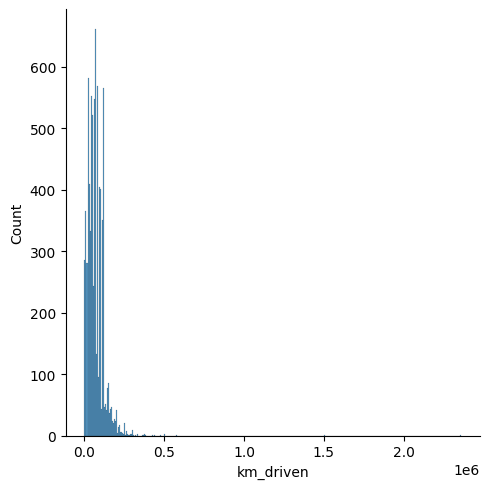

In [240]:
# Let's inspect the distribution plot, mean and median of km_driven
sns.displot(data=df, x='km_driven')
df['km_driven'].mean(),df['km_driven'].median()

(640393.6542102641, 450000.0)

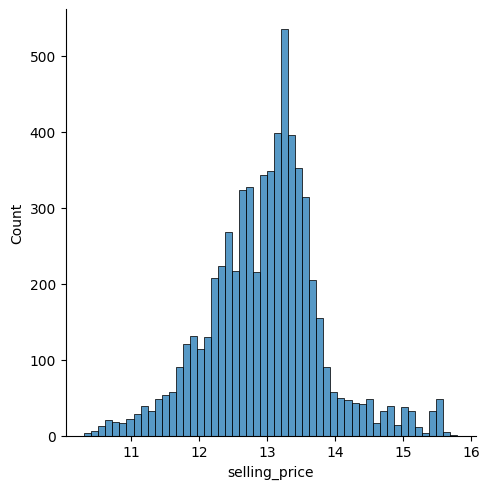

In [241]:
# Let's inspect the distribution plot, mean and median of selling_price
sns.displot(y_train)
df['selling_price'].mean(),df['selling_price'].median()

### Fill the missing Value

In [242]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True) #mean is good representation
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True) #mean is good representation
X_train['km_driven'].fillna(X_train['km_driven'].median(), inplace=True) #mean is good representation


- Replace missing value by adding X_train to X_test because your model learn the patterns in the training set

In [243]:
#Replace missing value by adding X_train to X_test because your model learn the patterns in the training set
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True) #mean is good representation
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True) #mean is good representation
X_test['km_driven'].fillna(X_train['km_driven'].median(), inplace=True) #mean is good representation


In [244]:
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_train.mean(), inplace=True)

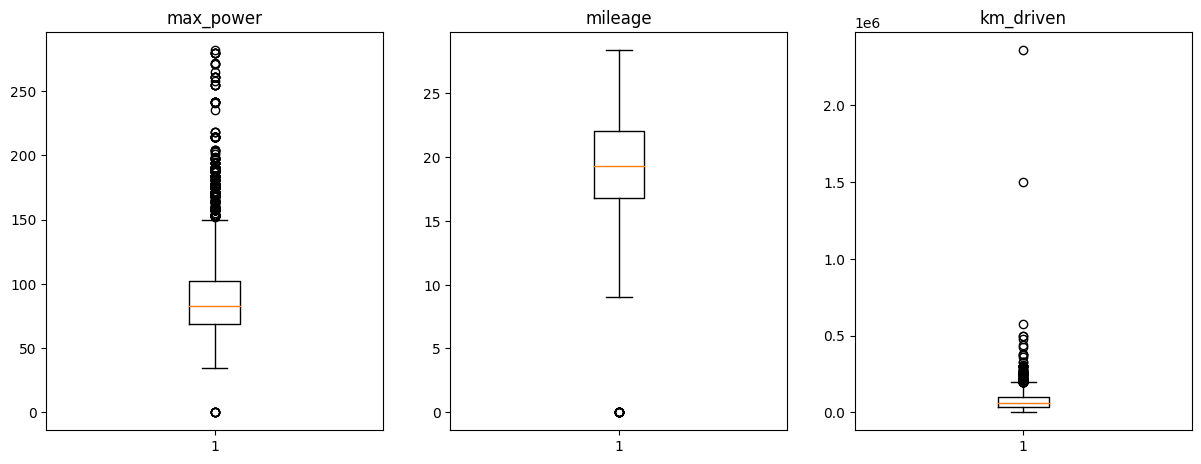

In [245]:
# Create a dictionary of columns.
col_dict = {'max_power':1, 'mileage':2, 'km_driven':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [246]:
def outlier_count(col, data = X_train): #create function that calculated the outliers
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [247]:
for col in X_train.columns: #Indicate the outlier
    outlier_count(col)


---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------km_driven---------------

Number of outliers: 119
Percent of data that is outlier: 1.85%


### Scaling

- will help your model understand and everything in a unique unit scale.        
- to solved  the plobem between data that have the more value and the less value.

In [248]:
from sklearn.preprocessing import MinMaxScaler

# select features that we have choosen.
features = ['max_power', 'mileage', 'km_driven']
scaler = MinMaxScaler(feature_range = (0, 1))
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features]  = scaler.transform(X_test[features])

#x = (x - mean) / std
#why do we want to scale our data before data analysis / machine learning

#allows your machine learning model to catch the pattern/relationship faster
#faster convergence

#how many ways to scale
#standardardization <====current way : The mean is good representation
# (x - mean) / std
#--> when your data follows normal distribution

#normalization <---another way : The mean is bad representation
# (x - x_min) / (x_max - x_min)
#---> when your data DOES NOT follow normal distribution (e.g., audio, signal, image) 

In [249]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## 5.Modeling

* Cross Validation + Grid search       
        _Cross Validation : find which one is the best algorithm.      
        Grid search : find the best version of algorithm's name._ 

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# Models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 42), 
              RandomForestRegressor(n_estimators = 100, random_state = 42)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [251]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error') #find mse, score and mean of mse
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}") #Higher is better...

Linear Regression - Score: [-0.28408714 -0.31678277 -0.2652536  -0.27052254 -0.28296924]; Mean: -0.2839230569264597
SVR - Score: [-0.22886504 -0.24468047 -0.25406565 -0.25708748 -0.22151872]; Mean: -0.2412434698931699
KNeighbors Regressor - Score: [-0.13208578 -0.11416584 -0.13086562 -0.13616084 -0.12481705]; Mean: -0.1276190274059565
Decision-Tree Regressor - Score: [-0.14060827 -0.13400548 -0.12553051 -0.15118469 -0.15597749]; Mean: -0.14146128904588887
Random-Forest Regressor - Score: [-0.10306196 -0.10628712 -0.0940965  -0.11521057 -0.10173803]; Mean: -0.10407883586395732


Grid search

In [252]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [ ]:
grid.best_params_

In [ ]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [ ]:
best_mse  # ignore the minus because it's neg_mean_squared_error 

Note that : mse : [0, infty) | 0 is the best

## 6.Testing

In [ ]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

In [ ]:
print(yhat) #check yhat

In [ ]:
y_pred_original = np.exp(yhat) #Turn yhat to the original one

In [ ]:
print(y_pred_original) 

## 7. Analysis: Feature Importance

Extracting which feature is important for prediction can help us interpret the results. There are several ways: algorithm, permutation, and shap.

Algorithm way

In [ ]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

In [ ]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

In [ ]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random-Forest Regressor Importance")

Permutation way :         
This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random-Forest Regressor Importance")

Shap way :        
The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (pip install shap)

In [ ]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [ ]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 8.Inferance

In [ ]:
import pickle

# save the model to disk
filename = 'model/car_price_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

# save the scaler to disk
scaler_path = 'model/scaler.prep'
pickle.dump(scaler, open(scaler_path, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

scaler = pickle.load(open('model/scaler.prep', 'rb'))

In [ ]:
sample_df = pd.DataFrame([[56,25.7,79457]])

In [ ]:
sample_df = scaler.transform(sample_df)
sample_df

In [ ]:
print(f"Predicted Price of the car: {np.exp(loaded_model.predict(sample_df))}")

# Report

This model is about car price prediction.There are 8128 samples,12 features and 1 label.It is the regression problem because the label, selling price, is continuous. There are a lots of datas in .CSV file. In the CSV file, there are name year selling_price km_driven fuel seller_type transmission mileage engine max_power torque seats.To deal with this datas we need to manage and understand the nature of the datas. For predicting prices of cars we not only trusted the correlation matrix or PPS but also understand the reality of features that have affect to selling prices. If we already understand the reality of the data we can choose the datas that have related to selling prices. In these notebook will choose the most 3 important features that have affected such as max_power, mileage, km_driven. Why we choose all this features? because when plotting the graph as we can see that we will discover what features are good or not good. The good will have related with the label,selling prices and the bad one is not related to selling prices not only for plotting but also looking to correlation matrix so that all the feature that I have choosen. when we already choosen the features, We need to decide the label that is selling prices. The next step, We will check the missing values of the data, To filling the missing value(imputation), We will fill with mean or median because we don't want the high MSE(Mean Squere Error). After that we will check the outliers and scales the datas. The scaling have 2 methods that is standadization and normalization. We will use standadization for scaling data when the data follow normal distribution and for the normalization when the data don't follow normalization so this is the method calls preprocessing. The next steps is Modeling. In this steps we will find the precise and accurate algorithm. There are the algoritms names : "Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor" we will explain each of the algorithm next paragraph so the step that find algoritms calls Cross-validation and to do the best version of algorithm we calls Grid search after that we will testing to predict selling prices from the data by training and testing set from previous section.

In [ ]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

# Result

In conclution, The most important features are 3 things but there can be more. some feature can be eliminated when you look to the correlation matrix. The matrix can tell us that we should not use feature that are highly correlated. In this case you can see that between max_power and engine were not use for features. 

In this case, The algorithm that perform well is Random-Forest Regression. because the mean of MSE is the highest from all algoritms. For picking the best algorithm, We will look to the mean of MSE of each algoritm. If mean of MSE in each algorithm is higher, the better to choose algorithm is that so we will explain what is each of algoritms that we have.
         
Linear Regression -> is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.  

SVR -> is a machine learning algorithm that extends the principles of Support Vector Machines (SVMs) to the task of regression. While SVMs are primarily used for classification tasks, SVR is designed for predicting continuous numeric values. SVR aims to find a regression function that fits the data while controlling the margin of error.  

KNeighbors Regressor -> is a supervised machine learning algorithm used for regression tasks. It is a non-parametric and instance-based algorithm that makes predictions based on the similarity of input data points to their neighboring data points. KNeighborsRegressor is an example of a lazy learner, meaning it doesn't build an explicit model during training, but instead, it stores the training data and uses it directly for making predictions.        

Decision-Tree Regressor -> is a supervised machine learning algorithm used for regression tasks. It's a type of decision tree algorithm that predicts a continuous target variable based on the features of the input data. Decision trees are versatile and easy to understand, making them a popular choice for both classification and regression problems.      
      
Random-Forest Regressor -> is a machine learning algorithm that belongs to the ensemble learning family. It's designed for regression tasks and is an extension of the concept of decision trees. The key idea behind a Random Forest Regressor is to build multiple decision trees and combine their predictions to improve overall accuracy and reduce overfitting.         